# General principles

The general principles of Bayesian analysis are pretty easy to understand:

1) Uncertainty or "degree of belief" is quantified by probability. 

2) The observed data are used to update the prior information or beliefs to become posterior information or beliefs. That’s all there is too it.

## An introductory example

To see how this works in practice, consider the following example. 

Assume you are given a test that consists of 10 factual questions of equal difficulty. 

What we want to estimate is your **ability**, which we define as the rate $\theta$ with which you answer questions correctly. We cannot directly observe your ability $\theta$ (it's a latent variable).

All that we can observe is your score on the test.

### Uniform prior

So, before we start to look at your data, we need to specify our prior uncertainty with respect to your ability $\theta$. 

This uncertainty needs to be expressed as a probability distribution, called the prior distribution. 

In this case, it is important to note that $\theta$ can range from 0 to 1, and that we do not know anything about your familiarity with the topic or about the difficulty level of the questions.

Then, a reasonable guess, or prior distribution, denoted by p($\theta$), is one that assigns equal probability to every value of $\theta$. 

This 'flat' prior would look like this:

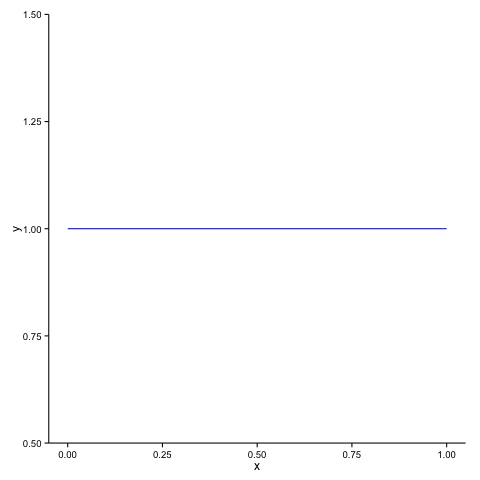

In [56]:
library("ggplot2")
p0 <- ggplot(data.frame(x = c(0, 1)), aes(x)) +
    theme_classic()

p1 <- p0 + stat_function(fun = dbeta, 
                      args = list(shape1 = 1, 
                                  shape2 = 1),
                     color = "blue")
p1

Now, we can look at your data; we observe that you answered 9 out of 10 questions correctly.

Now comes the tricky part: we need to update our **prior** belief  about your ability, $p(\theta)$, using the observed **data** $D$, in order to obtain a **posterior** estimate of your ability, $P(\theta | D)$.

How do we do this? We need to describe how the data were generated, which gives us the **likelihood** function, $P(D | \theta)$, and then we can combine prior and likelihood using Bayes theorem:

$$ p(\theta | D) = \frac{p(D|\theta) p(\theta)}{p(D)}$$

In words, this is:

$$ \textrm{posterior} = \frac{\textrm{likelihood x prior}}{\textrm{marginal likelihood}}$$

The marginal likelihood does not involve $\theta$, i.e. $\theta$ is integrated out. This means that the marginal likelihood states how likely the data were averaged over all possible values of $\theta$.

This is a single and ensures that the posterior integrates to 1 (as a probability distribution should).

The equation for the posterior is often written as:

$$ p(\theta | D) \propto p(D|\theta) p(\theta)$$

which says that the posterior is proportional to the product of likelihood and prior.

> Key idea: the posterior is a combination of what we thought before, and what we observed.

In this simple case, it is actually possible to work out mathematically what the posterior estimate of $\theta$ is:

if the data are distributed as:
 $$ y|\theta \sim Bin(n, \theta)$$
 
and the prior is:

$$\theta \sim Beta(a, b)$$

then the posterior is given by:

$$\theta | y \sim Beta(y+a, n-y+b)$$

For our example, if we observed $y = 9$ correct answers out of $n = 10$ questions, the posterior is therefore $Beta(9+1, 10-9+1)$, i.e. 

$$ \theta | y \sim Beta(10, 2)$$


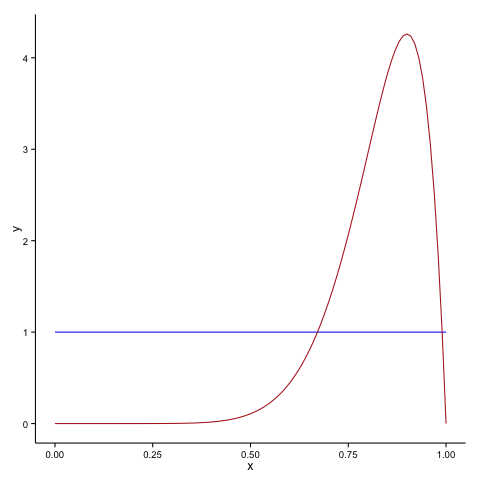

In [57]:
p1 + stat_function(fun = dbeta, 
                   args = list(shape1 = 10, shape2 = 2), 
                   color = 'firebrick')

The red line shows our posterior estimate of $\theta$. It is easy to see that it is influenced by the data, but what would have happened if we had believed that your ability to close to chance (you were guessing)?

We could express this prior belief using a [Beta distribution](http://en.wikipedia.org/wiki/Beta_distribution). The Beta distribution has two parameters, $a$ and $b$.

The mean of the Beta distribution is $\mu = \frac{a}{a+b}$, and the variance decreases with increasing $\phi = a+b$. If we want to express the belief that you might be guessing, we will want $\mu$ to be about $\frac{1}{2}$.

We can "interpret" $\phi$ as our certainty: if we strongly believe you were guessing, we can increase $\phi$.

### A more informed prior

Let's look at an example: We want $\mu = 0.5$ and $\phi = 10$ 

A little bit of algebra gives us:
$$ a = \mu \phi$$
$$ b = \phi -a = \phi - (\mu \phi) = (1-\mu)\phi$$

Therefore, $a$ should be $0.5 x 10 = 5$ and $b$ should be $(1-0.5)*10 = 5$. 

We can see that if $a=b$, the mean will be $0.5$.

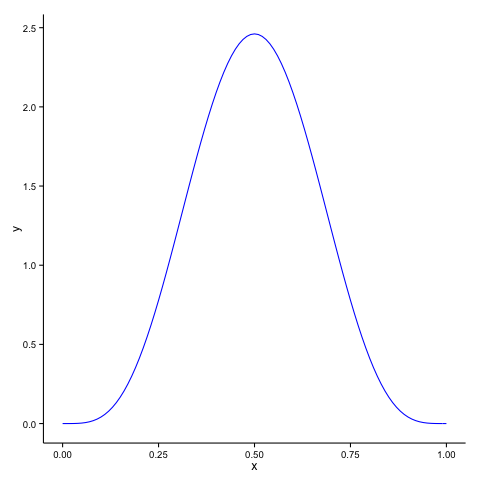

In [58]:
p2 <- p0 + stat_function(fun = dbeta, 
                   args = list(shape1 = 5, shape2 = 5), 
                   color = 'blue')
p2

The new posterior should now be $Beta(9+5, 10-9+5)$:

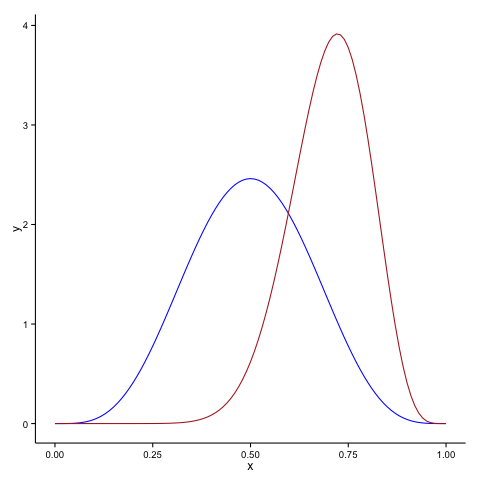

In [59]:
p2 + stat_function(fun = dbeta, 
                   args = list(shape1 = 14, shape2 = 6), 
                   color = 'firebrick')

We can see that our "informed" prior belief exerts a stronger influence on the posterior estimate, in the sense that we no longer believe the data quite as much.

### Exercise:

Take a few minutes to play around with the R code, and try out different priors (and correct answers).

### MCMC

Generally, though, it won't be possible to work out the posterior mathematically, because the marginal likelihood is often intractable (difficult to compute). This is why Bayesian analysis is difficult, and also why it has only recently become popular.

Because we cannot solve most problems analytically, we need computational approaches, i.e. Markov Chain Monte Carlo (MCMC) sampling.

Luckily, we can use Jags to do MCMC sampling for us, and we don't even need to know how this works. In this workshop, we will treat MCMC as a "black box", as understanding how sampling works would require a bit more time. 

## What Bayesian inference gives us

1) Flexibilty: using Bayesian inference, we can model the data, all we need to do is  specify the likelihood and prior distribution.

2) Bayesian inference is principled: all uncertainty is accounted for.

3) Intuitive conclusions: we can interpret the posterior in the way that most people would like to do intuitively, e.g. the posterior estimtate of the ability paramater is actually a probabilty. I can make statements such as "the probability that $\theta$ lies within a certain interval is 95%" (compare this with frequentist confidence intervals).